# Homework 3
## Exploratory Data Analysis
### Ali Asghar Yousuf
### ay06993@st.habib.edu.pk

In [111]:
import pandas as pd

In [112]:
file_name = 'loan_small.csv'
df = pd.read_csv(file_name)

## Part I

### Cleaned up term and converted it to int

In [113]:
df['term'] = df['term'].str.replace('months', '').astype(int)
df['term'].head()

0    36
1    60
2    36
3    36
4    60
Name: term, dtype: int32

### Cleaned up emp_length and converted it to float

In [114]:
df['emp_length'] = df['emp_length'].str.replace('years', '').str.replace('year', '').str.replace('+', '').str.replace('<', '').str.replace('n/', '').str.replace('n/a', '0').astype(float)
df['emp_length']

0      10.0
1       1.0
2      10.0
3      10.0
4       1.0
       ... 
994     5.0
995     3.0
996     2.0
997    10.0
998    10.0
Name: emp_length, Length: 999, dtype: float64

### Converted loan_status to binary attribute Fully Paid and Current are considered as good and rest are considered as bad

In [115]:
df['loan_status'].unique()

df['loan_status'] = df['loan_status'].str.replace('Fully Paid', 'good').str.replace('Charged Off', 'bad').str.replace('Late (31-120 days)', 'bad').str.replace('Current', 'bad').str.replace('Default', 'bad')
df['loan_status'].unique()

array(['good', 'bad'], dtype=object)

### Cleaning up verification_status

In [116]:
df['verification_status'].unique()
df['verification_status'] = df['verification_status'].str.replace('Source Verified', 'Verified')
df['verification_status'].unique() 

array(['Verified', 'Not Verified'], dtype=object)

### Filling in missing values for mths_since_last_delinq and mths_since_last_record

In [117]:
for col in ['mths_since_last_delinq', 'mths_since_last_record']:
    mean = df[col].mean()
    df[col] = df[col].fillna(mean)
    
df['mths_since_last_record'].isnull().sum()

0

## Part II

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

### Summary

#### Analysis of the loan amount table


In [119]:
df.groupby(['grade', 'sub_grade'])['loan_amnt'].agg(['mean', 'median', 'count'])

mean   median  count
grade sub_grade                              
A     A1          7225.925926   6200.0     27
      A2         10000.892857  10000.0     28
      A3          9336.718750   9475.0     32
      A4         12060.833333  10262.5     60
      A5         12330.909091  10000.0     55
B     B1         11850.000000  12000.0     71
      B2         11207.758621  10000.0     58
      B3         11527.976190  10000.0     84
      B4         12717.567568  11750.0     74
      B5         11391.044776  10400.0     67
C     C1         11816.949153  11000.0     59
      C2         12900.480769  10712.5     52
      C3         12052.205882  11100.0     34
      C4         12708.823529  13200.0     34
      C5         11957.142857  10000.0     28
D     D1         10007.142857  10000.0     28
      D2         13919.886364  12500.0     44
      D3         14141.176471  13625.0     34
      D4         15303.947368  15000.0     19
      D5         15536.538462  15700.0     13
E     E1         16838.888889  15000.0      9
      E2         19938.095238  20000.0     21
      E3         20135.000000  21400.0     15
      E4         16931.818182  16000.0     11
      E5         24382.812500  24812.5     16
F     F1         22562.500000  22250.0      8
      F2         17400.000000  20000.0      7
      F3         19750.000000  22000.0      3
      F4         15300.000000  15300.0      1
      F5          9237.500000   9237.5      2
G     G1         22400.000000  22400.0      1
      G2         12375.000000  12375.0      1
      G3         13000.000000  13000.0      1
      G4         24587.500000  24587.5      2

We can observe that the count of grade B loans is the highest and the count of grade G loans is the lowest. The grades are assigned based on the risk of the loan. The higher the grade the lower the risk. We can see that the highest mean loan amount is within the G grade which is the highest risk grade.

#### Anaylsis of the interest rate table


In [120]:
df.groupby(['grade', 'sub_grade'])['int_rate'].agg(['mean', 'median', 'count'])

mean  median  count
grade sub_grade                      
A     A1          6.03    6.03     27
      A2          6.62    6.62     28
      A3          7.51    7.51     32
      A4          7.90    7.90     60
      A5          8.90    8.90     55
B     B1          9.91    9.91     71
      B2         10.65   10.65     58
      B3         11.71   11.71     84
      B4         12.42   12.42     74
      B5         12.69   12.69     67
C     C1         13.49   13.49     59
      C2         14.27   14.27     52
      C3         14.65   14.65     34
      C4         15.27   15.27     34
      C5         15.96   15.96     28
D     D1         16.29   16.29     28
      D2         16.77   16.77     44
      D3         17.27   17.27     34
      D4         17.58   17.58     19
      D5         18.25   18.25     13
E     E1         18.64   18.64      9
      E2         19.03   19.03     21
      E3         19.42   19.42     15
      E4         19.91   19.91     11
      E5         20.30   20.30     16
F     F1         20.89   20.89      8
      F2         21.28   21.28      7
      F3         21.67   21.67      3
      F4         22.06   22.06      1
      F5         22.35   22.35      2
G     G1         22.74   22.74      1
      G2         23.13   23.13      1
      G3         23.52   23.52      1
      G4         23.91   23.91      2

Supporting our earlier analysis we can see that the highest mean interest rate is within the G grade which is the highest risk grade. One interesting thing to note is that grade B is the second lowest risk grade and it has a higher mean loan amount and interest rate than grade A, so it provides a good balance between risk and reward.

### Univariate Analysis

#### Analysis of the loan amount histogram

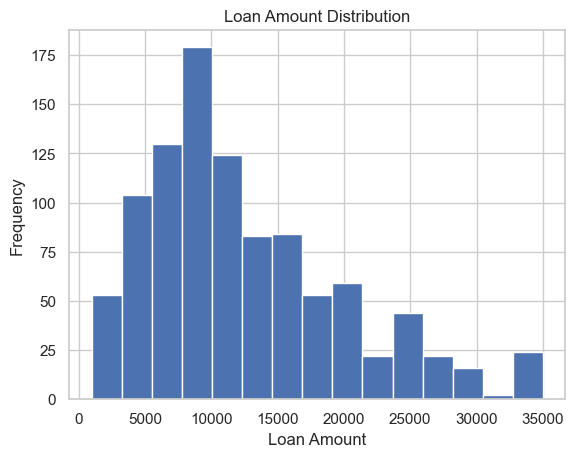

In [121]:
# plot loan_amnt
plt.hist(df['loan_amnt'], bins=15)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Loan Amount Distribution')
plt.show()

We can see that the loan amount histogram is skewed to the right. This means that the majority of the loans are small loans. This is a good thing because it means that the majority of the loans are small and the risk is low. Specifically we can see that a large chunk of the loans is between 5,000 and 15,000 dollars with a peak near 10,000.

#### Analysis of Home Ownership bar chart

C:\Users\ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instea

[Text(0.5, 1.0, 'Types of Residency')]

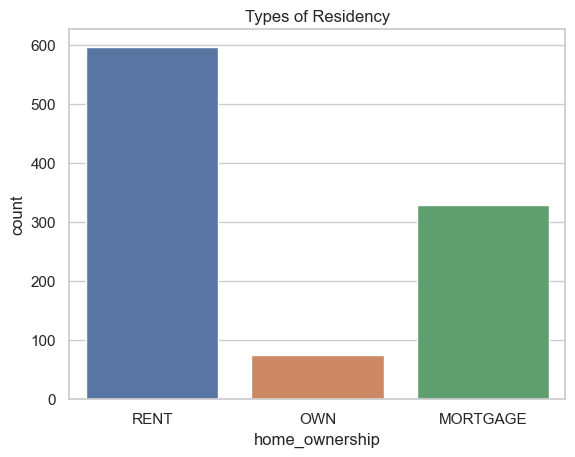

In [122]:
# plotting barcahrt for the above table
sns.countplot(x = 'home_ownership', data = df).set(title = 'Types of Residency')

We can see that the majority of the loans are taken by people who do not own a home. This hints towards 2 facts. The first is that the majority of people do not own a home. The second is that the majority of people who own a home do not take loans. 

### Bivariate Analysis

#### Analysis of the Loan Amount vs Interest Rate scatter plot

C:\Users\ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instea

[Text(0.5, 1.0, 'Loan Amount vs Interest Rate'),
 Text(0.5, 0, 'Loan Amount'),
 Text(0, 0.5, 'Interest Rate')]

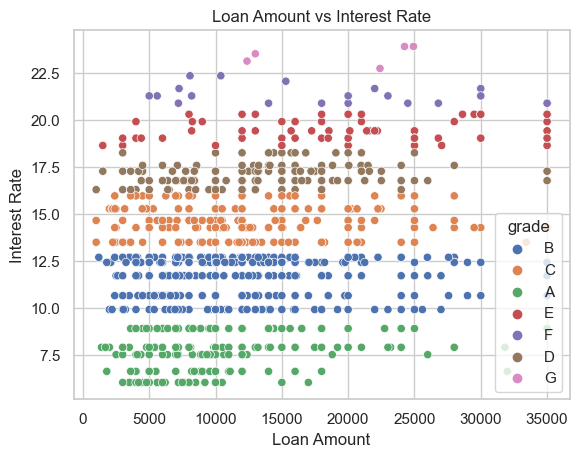

In [123]:
sns.scatterplot(data=df, x="loan_amnt", y="int_rate", hue="grade").set(title = 'Loan Amount vs Interest Rate', xlabel = 'Loan Amount', ylabel = 'Interest Rate')

We would expect that the higher the loan amount the higher the interest rate. This is because the higher the loan amount the higher the risk. But we can see that the scatter plot is not very clear. This is because the loan amount is not the only factor that determines the interest rate. The grade of the loan is also a factor. We previously saw that the higher the grade the lower the interest rate. This is because the higher the grade the lower the risk. So the grade of the loan is a more important factor than the loan amount.

#### Analysis of the Loan Amount vs Annual Income scatter plot

C:\Users\ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0.5, 1.0, 'Loan Amount vs Annual Income'),
 Text(0.5, 0, 'Loan Amount'),
 Text(0, 0.5, 'Annual Income')]

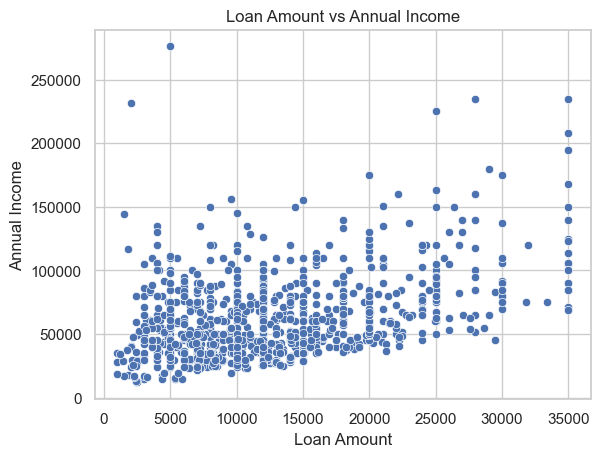

In [124]:
sns.scatterplot(data=df, x="loan_amnt", y="annual_inc").set(title = 'Loan Amount vs Annual Income', xlabel = 'Loan Amount', ylabel = 'Annual Income')

Here we see some correlation between the loan amount and the annual income. As the annual income increases the loan amount increases which makes sense. We can also see that the majority of the loans are taken by people with an annual income of less than 100,000 dollars. Which means that as an individual earns more they are less likely to take a loan.

#### Analysis of Interest Rate vs Grade box plot

C:\Users\ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0.5, 1.0, 'Interest Rate vs Grade'),
 Text(0.5, 0, 'Grade'),
 Text(0, 0.5, 'Interest Rate')]

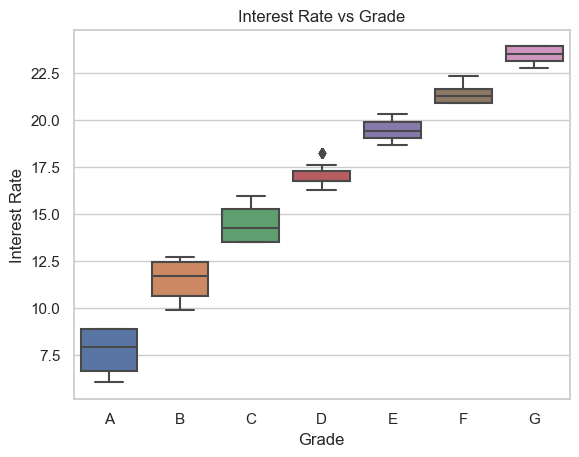

In [125]:
# Box plot of interest rate vs grade
sns.boxplot(x="grade", y="int_rate", data=df, order=['A', 'B', 'C', 'D', 'E', 'F', 'G']
            ).set(title = 'Interest Rate vs Grade', xlabel = 'Grade', ylabel = 'Interest Rate')


We can see that the higher the grade the lower the interest rate. This is because the higher the grade the lower the risk. We can also see that the interest rate for grade G is the highest. This is because grade G is the highest risk grade. It also shows the variance of the interest rate for each grade. We can see that the variance is the highest for grade A.

### Multivariate Analysis

#### Analysis of the heatmap

[Text(0.5, 1.0, 'Correlation Matrix')]

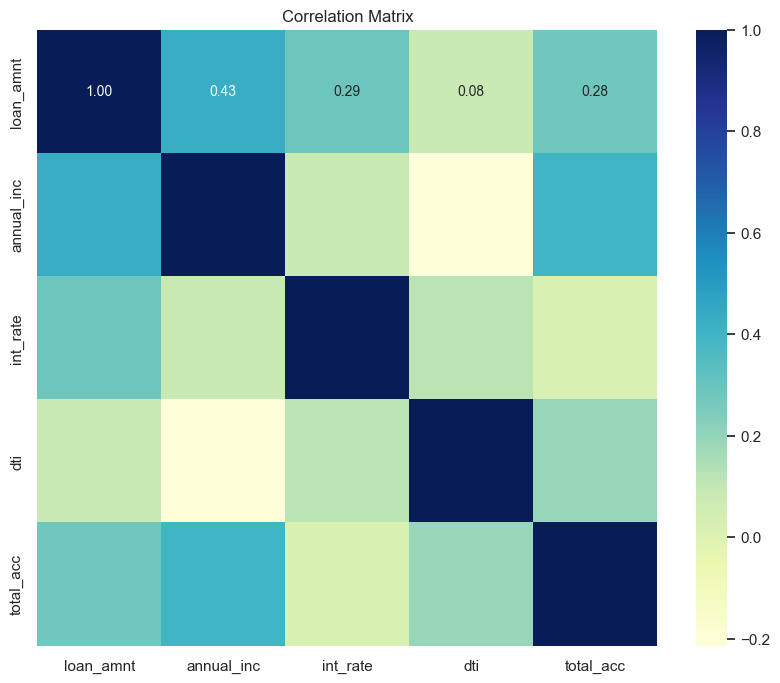

In [135]:
cols = ['loan_amnt', 'annual_inc', 'int_rate', 'dti', 'total_acc']

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[cols].corr(), annot=True, cmap='YlGnBu', fmt=".2f", annot_kws={"size": 10}).set(title = 'Correlation Matrix')


We can observe that we find some interesting patterns emerging in our correlation matrix. We can see that the loan amount and the annual income are positively correlated. This means that as the annual income increases the loan amount increases. We can also see that the loan amount and the interest rate are also positively correlated. Which makes sense because the higher the loan amount the higher the risk and the higher the interest rate.
We also see a negative correlation between "dti" and the annual income.

Note: I was having some trouble with my seaborn and matplotlib version so the heatmap is not showing the correlation values but we can infer the correlation from the color of the boxes.

#### Analysis of the Pairplot

C:\Users\ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instea

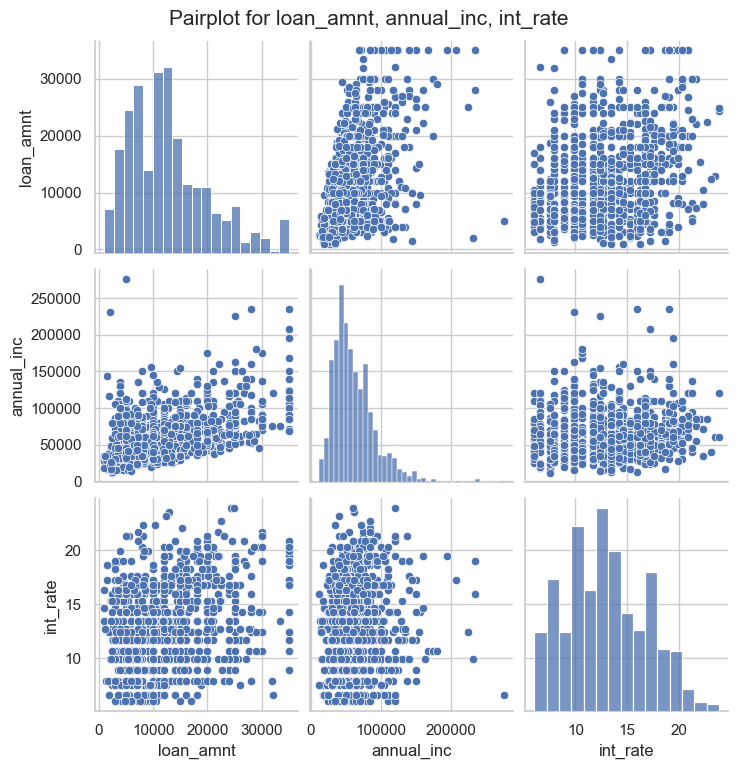

In [140]:
cols = ['loan_amnt', 'annual_inc', 'int_rate']

# Plotting the pairplot
sns.pairplot(df[cols], height=2.5)
plt.suptitle('Pairplot for loan_amnt, annual_inc, int_rate', y=1.02, fontsize=15)
plt.show()

The "loan_amnt," "annual_inc," and "int_rate" financial variables, as well as their correlations and distributions, are all clearly visible in the pair plot. It provides numerous significant insights about the dataset. First, the scatterplots show that annual salaries and loan amounts frequently cluster within particular ranges. This implies that borrowers typically ask for loans that correspond to their income levels. A prevalent pattern in lending is indicated by the positive connection between loan amount and annual income, which shows that borrowers with greater salaries are more likely to be approved for larger loans.